### Implementation notebook
This notebook contains the implementation of our project code

In [1]:
from ct_projection_optimizer import OptimalViewFinder as OptimalViewFinder

In [2]:
input_path = r"C:\\Users\\20202310\Desktop\\Vakken jaar 1\\Mix team challenge\\Practical assignment\\DATA\\Team challenge 2024\\Aneurysm_TC_data\\C0074\\corrected_mask_C0074.nii"

Found 2 different aneurysms.
Isolated aneurysm 1
Isolated aneurysm 2
<class 'numpy.ndarray'>
Visualizing data with shape: (128, 128, 128)
Unique values in data: [0 1 2]


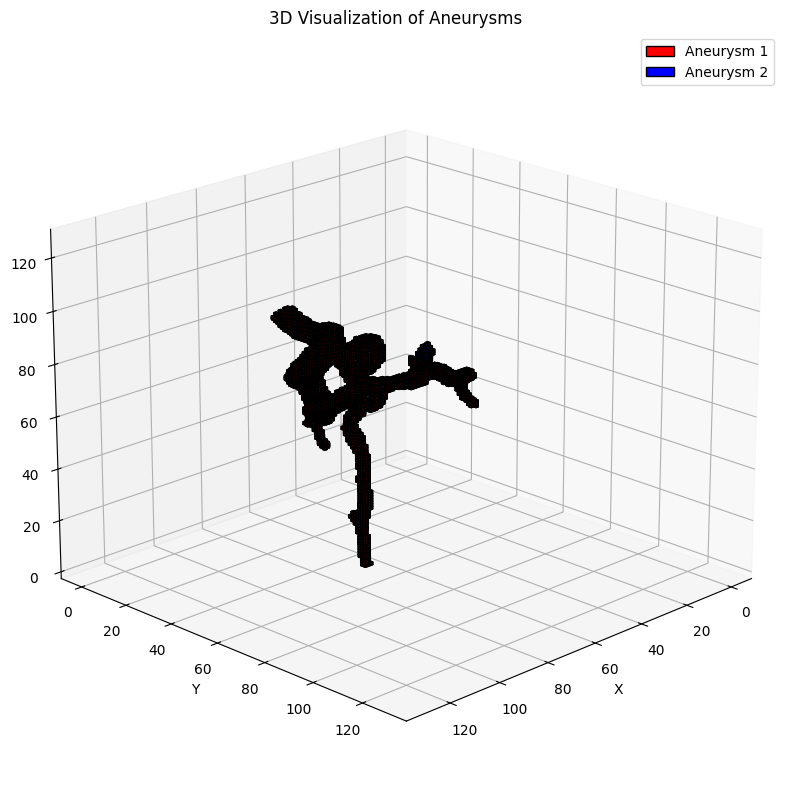

In [3]:
#CREATING CLASS OBJECT:

obj = OptimalViewFinder(input_path)
isolated_aneurysms = obj.isolate_aneurysms(verbose=True)
print(type(isolated_aneurysms[0]))
obj.visualize_3d_voxels()



In [4]:
plot_data = isolated_aneurysms[0]

In [5]:
import dash
from dash import dcc, html
import plotly.graph_objects as go
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage

# Get the coordinates of voxels where value == 1 and 2
x1, y1, z1 = np.where(plot_data == 1)
x2, y2, z2 = np.where(plot_data == 2)

# Downsample the coordinates for both labels (1 and 2)
def downsample_coordinates(x, y, z, factor=2):
    indices = np.arange(0, len(x), factor)
    return x[indices], y[indices], z[indices]

# Get the coordinates of voxels where value == 1 and 2
x1, y1, z1 = np.where(plot_data == 1)
x2, y2, z2 = np.where(plot_data == 2)

# Downsample the coordinates for both labels (1 and 2)
def downsample_coordinates(x, y, z, factor=2):
    indices = np.arange(0, len(x), factor)
    return x[indices], y[indices], z[indices]

# Get the coordinates of voxels where value == 1 and 2
x1, y1, z1 = np.where(plot_data == 1)
x2, y2, z2 = np.where(plot_data == 2)

# Downsample the coordinates for both labels (1 and 2)
def downsample_coordinates(x, y, z, factor=2):
    indices = np.arange(0, len(x), factor)
    return x[indices], y[indices], z[indices]

# Downsample the coordinates for both labels (1 and 2)
x1, y1, z1 = downsample_coordinates(x1, y1, z1, factor=2)
x2, y2, z2 = downsample_coordinates(x2, y2, z2, factor=2)

# Initialize the Dash app
app = dash.Dash(__name__)

# Create a 3D scatter plot using Plotly
fig = go.Figure()



# Add points for value 1 (e.g., red)
fig.add_trace(go.Scatter3d(
    x=x1, y=y1, z=z1,
    mode='markers',
    marker=dict(size=2, color='red'),
    name="Label 1"
))

# Add points for value 2 (e.g., blue)
fig.add_trace(go.Scatter3d(
    x=x2, y=y2, z=z2,
    mode='markers',
    marker=dict(size=2, color='blue'),
    name="Label 2"
))

# Initial camera view
initial_camera = dict(
    eye=dict(x=1.5, y=1.5, z=1.5),
    up=dict(x=0, y=0, z=1)
)

# Layout of the Dash app
app.layout = html.Div([
    
    # Add padding/margin to create space between the plot and angle values
    html.Div(id='camera-angles', style={'padding': '10px', 'font-size': '20px', 'textAlign': 'center', 'margin-bottom': '20px', 'color': 'white'}),
    dcc.Graph(
        id='3d-plot',
        figure=fig,
        config={'scrollZoom': True, 'displayModeBar': True},
        style={'height': '70vh'}
    ),
])

# Update the camera angles based on user interaction
@app.callback(
    dash.dependencies.Output('camera-angles', 'children'),
    [dash.dependencies.Input('3d-plot', 'relayoutData')]
)
def update_camera_angles(relayoutData):
    # Ensure relayoutData is not None and contains camera data
    if relayoutData is not None and 'scene.camera' in relayoutData:
        camera = relayoutData['scene.camera']
        if camera:
            eye = camera['eye']
            # Calculate azimuth and elevation
            azimuth = np.arctan2(eye['y'], eye['x']) * 180 / np.pi  # In degrees
            elevation = np.arctan2(eye['z'], np.sqrt(eye['x']**2 + eye['y']**2)) * 180 / np.pi
            return f"Azimuth: {azimuth:.2f}°, Elevation: {elevation:.2f}°"
    # Return a default value if relayoutData is None or doesn't contain camera information
    return "Azimuth: 0°, Elevation: 0°"

if __name__ == '__main__':
    app.run_server(debug=True,mode="external")